<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Proyecto 02: Free Style

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_projectYY_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__:

__Rol__:

## Prediciendo _Pulsars_

Un púlsar (del acrónimo en inglés de pulsating star, que significa «estrella que emite radiación muy intensa a intervalos cortos y regulares») es una estrella de neutrones que emite radiación periódica. Los púlsares poseen un intenso campo magnético que induce la emisión de estos pulsos de radiación electromagnética a intervalos regulares relacionados con el periodo de rotación del objeto. [Wikipedia](https://es.wikipedia.org/wiki/P%C3%BAlsar).

![pulsar](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Chandra-crab.jpg/600px-Chandra-crab.jpg)

_A composite image of the Crab Nebula showing the X-ray (blue), and optical (red) images superimposed. The size of the X-ray image is smaller because the higher energy X-ray emitting electrons radiate away their energy more quickly than the lower energy optically emitting electrons as they move._

### Descripción de los datos

In [1]:
!cat data/Readme.txt

******************************************************************************************

# HTRU2

Author: Rob Lyon, School of Computer Science & Jodrell Bank Centre for Astrophysics,
		University of Manchester, Kilburn Building, Oxford Road, Manchester M13 9PL.

Contact:	rob@scienceguyrob.com or robert.lyon@.manchester.ac.uk
Web:		http://www.scienceguyrob.com or http://www.cs.manchester.ac.uk
			or alternatively http://www.jb.man.ac.uk
******************************************************************************************

1. Overview

	HTRU2 is a data set which describes a sample of pulsar candidates collected during the
	High Time Resolution Universe Survey (South) [1]. 
	
	Pulsars are a rare type of Neutron star that produce radio emission detectable here on
	Earth. They are of considerable scientific interest as probes of space-time, the inter-
	stellar medium, and states of matter (see [2] for more uses). 
	
	As pulsars rotate, their emission beam sweeps across the sky, and 

### Objetivo

El objetivo es a partir de los datos, hacer la mejor predicción si un registro es un __pulsar__ o no. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. Sin embargo, se busca escoger el mejor modelo de clasificación con una métrica específica (_precision_).

* Se solicita ajustar tres modelos de clasificación, una regresión logística, KNN y un tercero a elección del siguiente [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Finalmente, realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 

En este informe __siempre__ debes utilizar _score_ / _scoring_ la métrica [_precision_](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), tanto para el _Cross Validation_, _Hyper Parameter Tuning_ y _Prediction_. Toda la información al respecto de las métricas se encuentra [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#metrics-and-scoring-quantifying-the-quality-of-predictions). 

### Evaluación

Este jupyter notebook debe ser autocontenido, considera que es un informe técnico donde debes detallar cada paso, comentando código, utilizando variables con nombres adecuados, realizando gráficos y agregando apreciaciones personales cuando sea necesario. __No escatimes recursos a la hora de escribir.__

__Escenario:__ Te encuentras trabajando como _data scientist / data analyst / machine learning engineer / etc._ y este trabajo será presentado al resto del equipo, en especial a tu jefe directo. Todos tienen conocimiento del problema y de machine learning, por lo que no puedes pasar por alto los aspectos técnicos de tu desarrollo. __Al final del informe, debes entregar tus conclusiones, visualizaciones y apreciaciones personales.__

__Preguntas a responder:__

* ¿Cuál modelo tiene mejor _precision_?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?
* ¿Por qué utilizar _precision_ y no otro score?


### Rúbrica

* __Estadística Descriptiva__ (5 pts)
* __Visualización__ (10 pts)
* __Preprocesamineto__ (5 pts)
* __Regresión Logística__ (10 pts)
* __K Nearest Neighbours__ (15 pts)
* __Modelo a elección__ (15 pts)
* __Selección de Modelos__ (20 pts)
* __Conclusiones__ (20 pts)

## Contenidos

* [Estadística Descriptiva](#descr_stat)
* [Visualización](#visualization)
* [Preprocesamineto](#preprocessing)
* [Regresión Logística](#logistic)
* [K Nearest Neighbours](#knn)
* [Modelo a elección](#free-style)
* [Selección de Modelos](#model-selection)
* [Conclusiones](#conclusions)

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(
    os.path.join("data", "HTRU_2.csv"),
    header=None,
    names=[
        "mean_integrated_profile",
        "std_integrated_profile",
        "excess_kurtosis_integrated_profile",
        "skewness_integrated_profile",
        "mean_dmsnr",
        "std_dmsnr",
        "excess_kurtosis_dmsnr",
        "skewness_dmsnr",
        "is_pulsar",
    ]
)
df.head()

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


<a id='descr_stat'></a>

## Estadística Descriptiva

* Dar una pequeña definición de las columnas (_features_).
* Análisis descriptivo.
* Valores atípicos.
* Análisis específico a la variable _target_.

* Las columnas relacionadas con integrated_profile, muestran el promedio, la desviacion estandar,
la curtosis y la oblicuidad del las longitud determinada de señales que fueron promediadas tanto en tiempo como en frecuencia. Las columnas relacionadas con dmrst mide el promedio, la desviacion estandar,
la curtosis y la oblicuidad de la relacion (determinada con una curva) entre la dm y s/t.
La columna is_pulsar entrega una clasificacion, si los datos medidos corresponden a un pulsar, o no.
* La idea de que a partir de los datos que se entregan, determinar si a partir de los datos conseguidos anteriormente, se puede clasificar entre pulsar y no pulsar. La data tiene un total de 17897 donde 1,639 no son pulsar y 16,259 si lo son.
* Con un analisis rapido de los datos, no se puede determinar si existen datos atípicos en las 8 columnas de la Data.
* A simple vista, la variable target correspondiente a la columna is_pulsar, corresponde a una variable binaria que entrega una etiqueta, ya que clasifica a los datos en pulsar y no pulsar. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_integrated_profile               17898 non-null float64
std_integrated_profile                17898 non-null float64
excess_kurtosis_integrated_profile    17898 non-null float64
skewness_integrated_profile           17898 non-null float64
mean_dmsnr                            17898 non-null float64
std_dmsnr                             17898 non-null float64
excess_kurtosis_dmsnr                 17898 non-null float64
skewness_dmsnr                        17898 non-null float64
is_pulsar                             17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


<a id='visualization'></a>

In [5]:
df.describe()

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr,is_pulsar
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [6]:
from scipy import stats

#FALTA HACERLO PARA TODAS LAS COLUMNAS

#Busqueda de outliers con rango intercuartil

Q1 = df.describe().T["25%"] #Cuartil 1
Q3 = df.describe().T["75%"] # Cuartil 3
RIQ = Q3 - Q1 #Rango intercuartil
LI = Q1 - 3*RIQ #Limite inferior
LS = Q3 + 3*RIQ #Limite superior
df[["mean_integrated_profile"]].loc[(df["mean_integrated_profile"] < LI["mean_integrated_profile"])|(df["mean_integrated_profile"] > LS["mean_integrated_profile"])]



,mean_integrated_profile
132,18.117188
227,11.820312
283,20.351562
369,8.226562
401,14.906250
...,...
14368,18.851562
14468,8.242188
14701,21.726562
17199,16.250000


In [7]:
list(df.drop(columns="is_pulsar").columns)




['mean_integrated_profile',
 'std_integrated_profile',
 'excess_kurtosis_integrated_profile',
 'skewness_integrated_profile',
 'mean_dmsnr',
 'std_dmsnr',
 'excess_kurtosis_dmsnr',
 'skewness_dmsnr']

## Visualización

* Histogramas.
* Scatter matrix coloreando por el _target_.
* Mapa de calor con correlación entre variables.

Puedes utilizar `matplotlib` o `altair`, como sea de tu preferencia.

In [8]:
import altair as alt
import matplotlib.pyplot as plt

alt.themes.enable("opaque")

%matplotlib inline

In [9]:
df_url = os.path.join("data", "HTRU_2-Copy1.json")
df.to_json(df_url, orient="records")
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [10]:
new_names = { 
    "mean_integrated_profile":"promedio de perfil integrado",
    "std_integrated_profile": "desviacion estandar de perfil integrado",
    "excess_kurtosis_integrated_profile": "exceso de kurtosis de perfil integrado",
    "skewness_integrated_profile": "oblicuidad de perfil integrado",
    "mean_dmsnr": "promedio de dmsnr",
    "std_dmsnr": "desviacion estandar de dmsnr",
    "excess_kurtosis_dmsnr": "exceso de kurtosis de dmsnr",
    "skewness_dmsnr": "oblicuidad de dmsnr",
    "is_pulsar": "es pulsar"
}


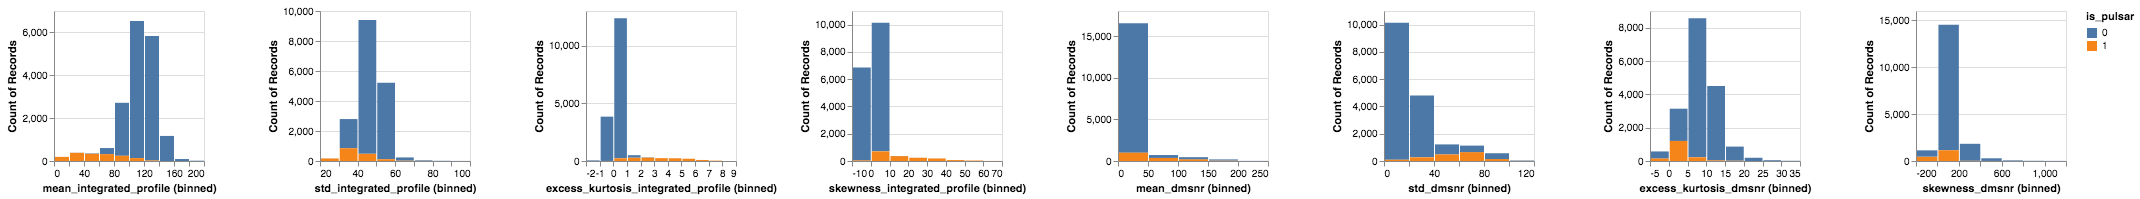

In [11]:
alt.Chart(df_url).mark_bar().encode(
    alt.X(alt.repeat("column"),type="quantitative",bin=True),
    alt.Y("count()",type="quantitative"),
    alt.Color("is_pulsar:N")
).properties(
    width = 150,
    height= 150
).repeat(
    column = list(df.drop(columns="is_pulsar").columns)
)

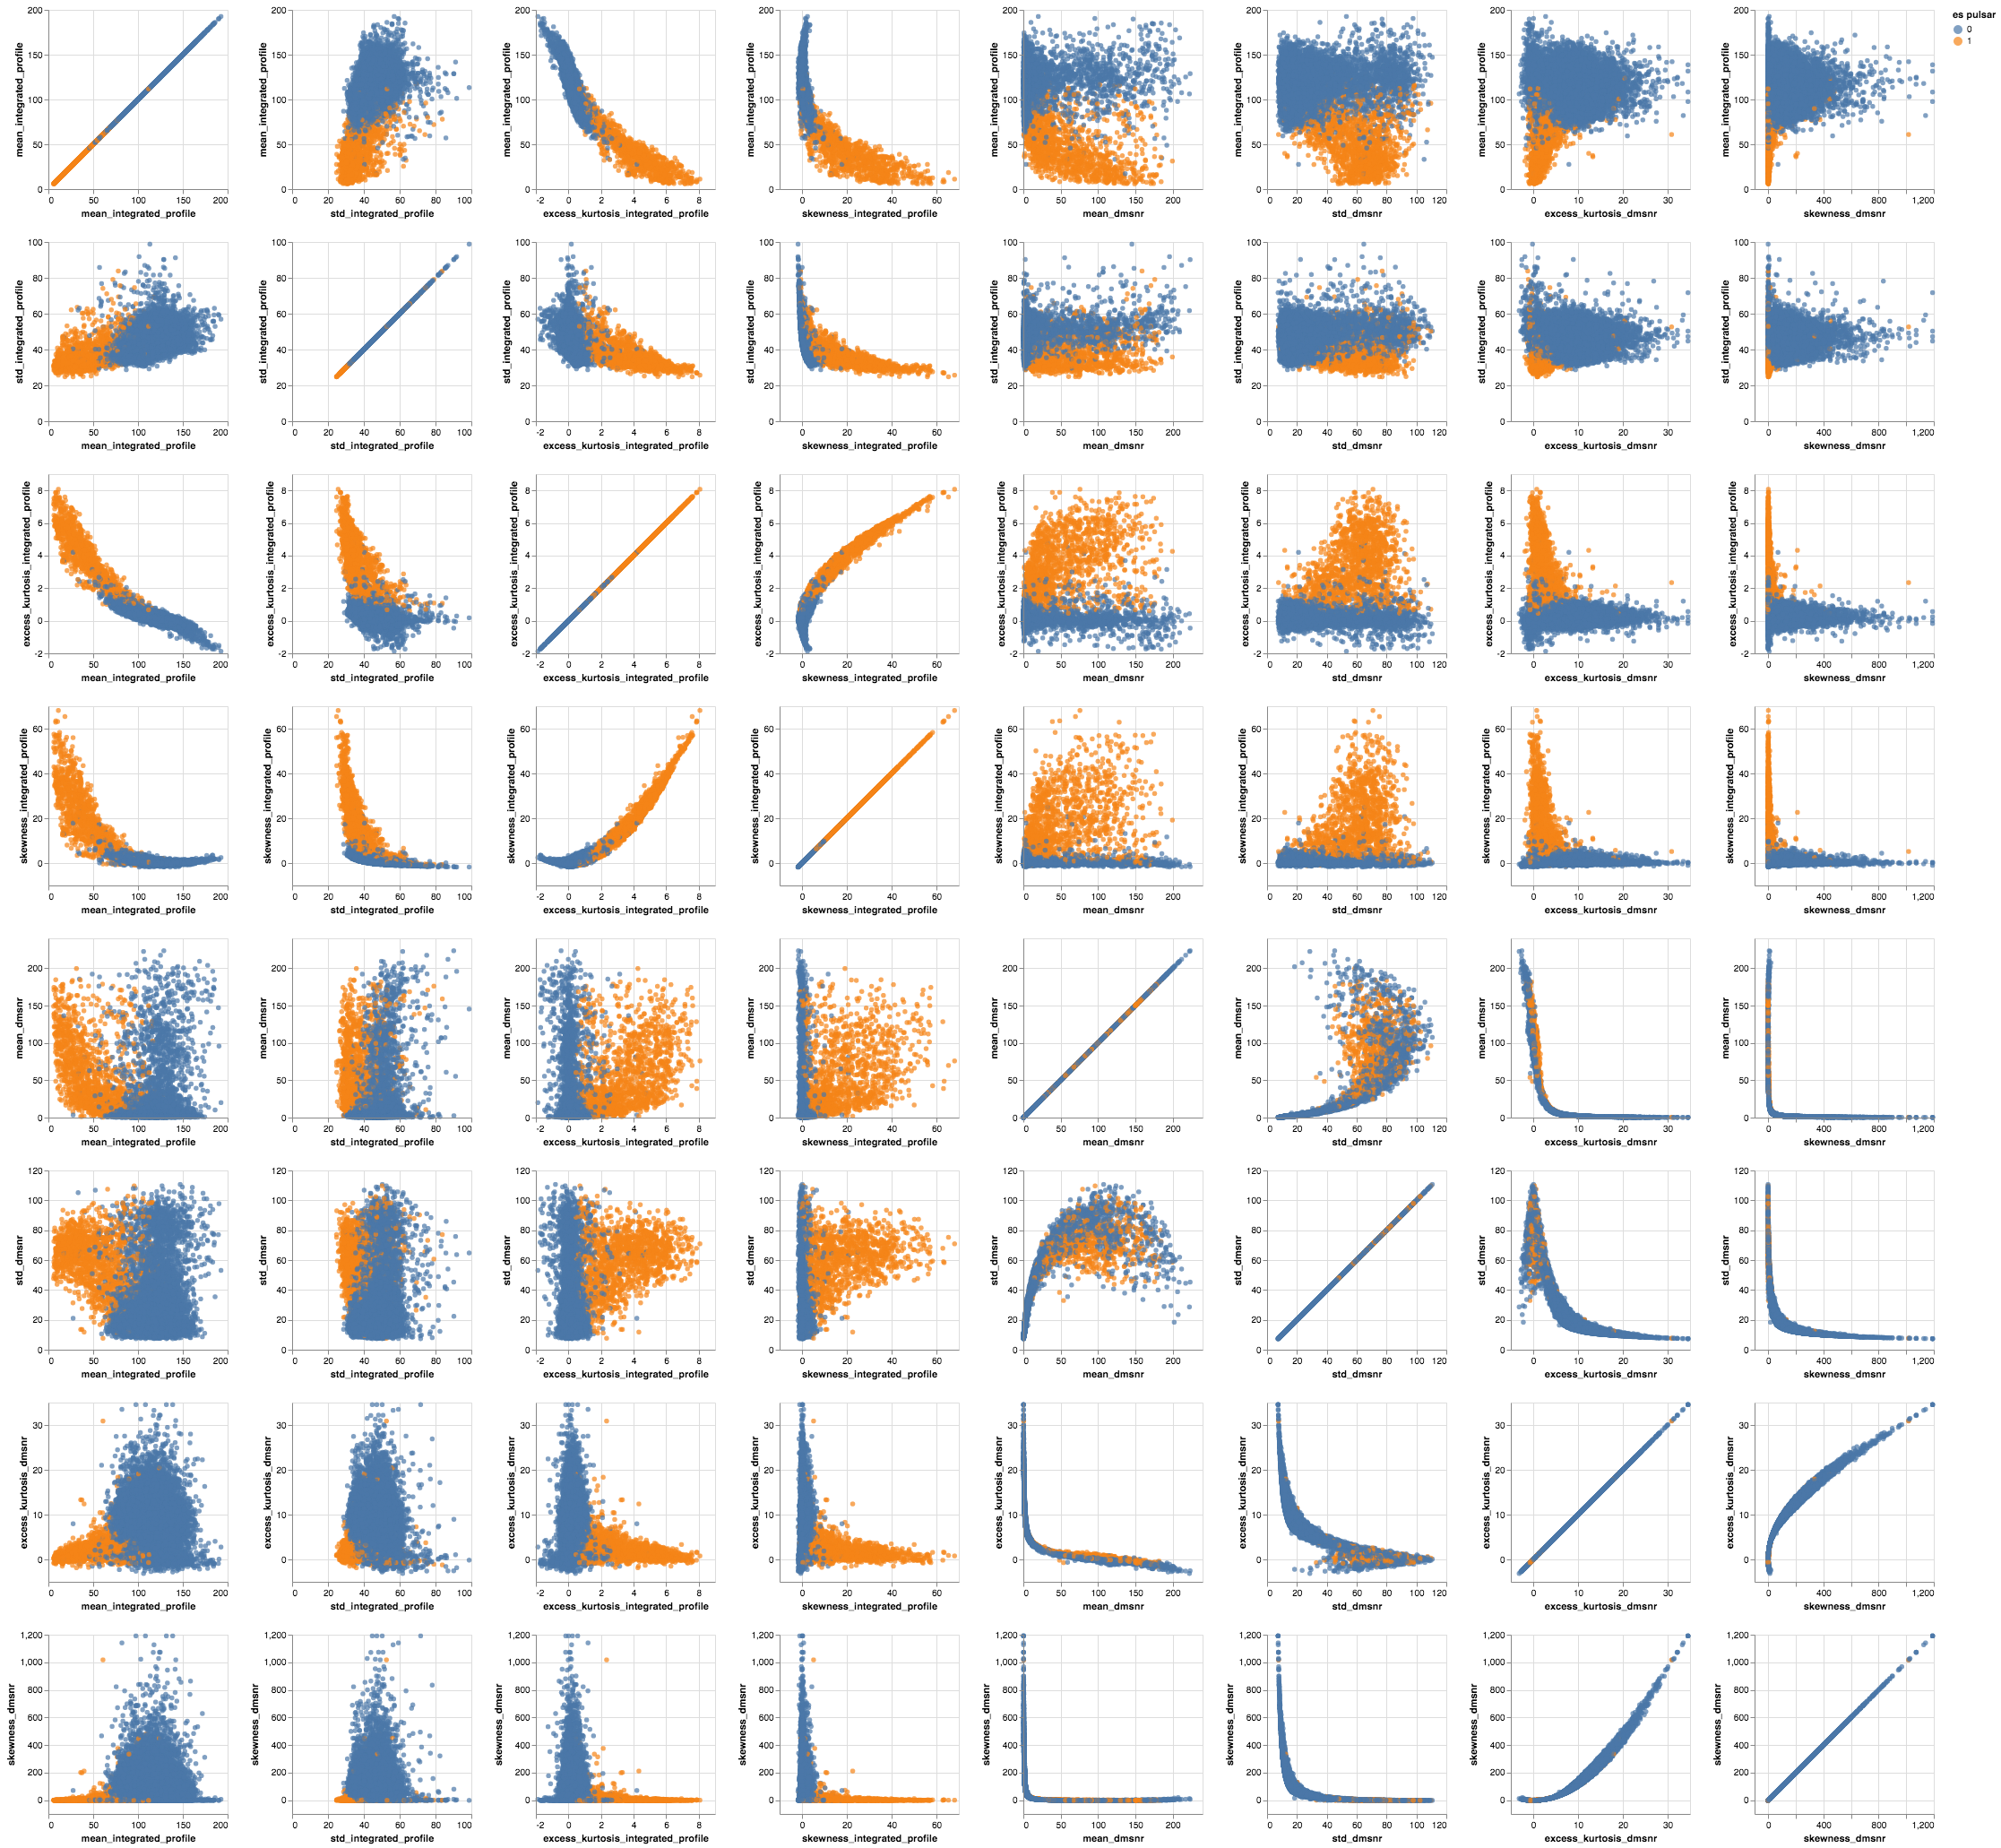

In [12]:
alt.Chart(df_url).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    alt.Color("is_pulsar:N",title = new_names["is_pulsar"])
    ).properties(
        width=200,
        height=200
    ).repeat(
        row=list(df.drop(columns="is_pulsar").columns),
        column=list(df.drop(columns="is_pulsar").columns)
)

In [13]:
#FALTA MODIFICAR LOS LABELS
#FALTAN MAPAS DE CALOR



<a id='preprocessing'></a>

## Preprocesamiento

Es hora de preparar los datos para la selección de modelos. Se solicita que:

* Crear el _numpy.array_ `X_raw` con las columnas predictoras de `df`.
* Crear el _numpy.array_ `y` con la columna a predecir de `df`.
* Definir un _transformer_ `StandarScaler` declarado como `scaler`, luego ajustar con los datos de `X_raw`.
* Definir el _numpy.array_ `X` luego de transformar los datos de `X_raw` con `scaler`. Verificar que tenga media nula y desviación estándar unitaria.
* Dividir la data en _train_ (90%) y _test_ (10%) utilizando como argumento `random_state=42`.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
X_raw = df.drop(columns = "is_pulsar").values
y = df["is_pulsar"].values

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
print(f"Media = {X.mean(axis=0).round(3)} \n")
print(f"Desviacion estandar = {X.std(axis=0)}")

Media = [-0. -0.  0.  0. -0.  0.  0.  0.] 

Desviacion estandar = [1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
## FREE STYLE ##

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9,test_size=0.1, random_state = 42)

<a id='logistic'></a>

## Regresión Logística

Utiliza la función `cross_validate` con el estimador `logistic` para realizar una estimación del _score_

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [20]:
logistic = LogisticRegression()
logistic_cv = cross_validate(logistic,X_train,y_train,scoring="precision",cv=10)

In [21]:
print(f'Logistic Regression Cross Validation precision score: {np.mean(logistic_cv["test_score"]):.5f} +/- {np.std(logistic_cv["test_score"]):.5f}')

Logistic Regression Cross Validation precision score: 0.94069 +/- 0.01803


In [22]:
logistic.fit(X_train,y_train)
logistic.score(X_test,y_test)

0.9804469273743017

<a id='knn'></a>

## K Nearest Neighbours

Utiliza `GridSearchCV` para encontrar el mejor valor de `n_neighbors`. Luego, con el mejor _estimator_ de `knn` realiza la validación cruzada para obtener el intervalo de confianza del _score_.

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [24]:
## FIX ME ##
k_array = np.arange(2,20)
digits_gscv = GridSearchCV(estimator=KNeighborsClassifier(),param_grid={"n_neighbors":k_array})
digits_gscv.fit(X_train,y_train)
knn = digits_gscv.best_params_
knn #Se demora mucho en cargar, testear poco

{'n_neighbors': 9}

In [25]:
## FRE STYLE ##

In [26]:
kneigh = KNeighborsClassifier()
knn_cv = cross_validate(kneigh,X_train,y_train,cv=10,scoring="precision")

knn_cv

{'fit_time': array([0.01895404, 0.01398516, 0.02408504, 0.02107596, 0.01176119,
        0.01189208, 0.01162696, 0.01226807, 0.01312995, 0.01315784]),
 'score_time': array([0.16038513, 0.27010775, 0.20658207, 0.15096402, 0.09653783,
        0.11266875, 0.11948085, 0.11501575, 0.10687208, 0.11538506]),
 'test_score': array([0.9469697 , 0.90225564, 0.94615385, 0.91044776, 0.90977444,
        0.95348837, 0.9270073 , 0.89583333, 0.94615385, 0.928     ])}

In [27]:
print(f'KNN Cross Validation precision score: {round(np.mean(knn_cv["test_score"]),5):.2f} +/- {round(np.std(knn_cv["test_score"]),5):.2f} with train data.')

KNN Cross Validation precision score: 0.93 +/- 0.02 with train data.


<a id='free_style'></a>

## Modelo a elección

* Escoge un modelo de clasificación de [aquí](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) que por lo menos tenga un hiperparámetro, por ejemplo, [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) tiene el parámetro de regularización `C`.
* Explica en uno o dos párrafos en qué consiste el algoritmo/modelo.
* Al igual que KNN, encuentra el/los mejores valores para los hiperparámetros.
* Con el mejor estimador realiza _Cross Validation_ con los datos de entrenamiento.
* Calcula el intervalo de confianza de _precision_.

In [28]:
my_model = ## FIX ME ##

SyntaxError: invalid syntax (<ipython-input-28-b7e7efe03fb8>, line 1)

In [ ]:
my_model_cv = ## FIX ME ##

In [ ]:
## FRE STYLE ##

In [ ]:
print(f'MY MODEL Cross Validation precision score: {np.mean(my_model_cv["test_score"]):.2f} +/- {np.std(my_model_cv["test_score"]):.2f} with train data.')

<a id='model_selection'></a>

## Selección de Modelo

* Compara la _precision_ entre cada uno de los modelos.
* Grafica la matriz de confusión para cada uno de los modelos.
* Calcula un intervalo de confianza del tiempo utilizado en el ajuste de cada modelo. Ver documentación de `cross_validate`.
* Gráficos o reportes adicionales.

In [ ]:
from sklearn.metrics import precision_score, classification_report

In [ ]:
print(f'Logistic Regression test precision score: {## FRE STYLE ##}')

In [ ]:
print(f'KNN test precision score: {## FRE STYLE ##}')

In [ ]:
print(f'MY MODEL test precision score: {## FRE STYLE ##}')

In [ ]:
## FREE STYLE ##

<a id='conclusions'></a>

## Conclusiones

Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultados, etc.

In [ ]:
## FRE STYLE ##